# Homework 3 - Logistic Regression

# COSC 3337 -  Dr. Rizk

### __About The Data__

The data we'll be using has the following attributes related to heart disease. It's different than the previous HW in terms of data:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: female or male (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death: if the patient died during the follow-up period (boolean) 

For each ```boolean``` variable, a value of 1 = True and 0 = False. For sex, female = 0 and male = 1.


### __Problem Statement__

Remember, data science tasks usually involve some sort of stakeholder who wants to learn something from the data, but don't know what to do. That's where you, the data scientist, come in! As part of a consultant group, you are a data scientist who has been contracted by a research team of cardiologists to try and better understand their group of patients. Specifically, they would like for you to:

- Predict patient survival

In this assignment, we will be using Logistic Regression to try and predict heart disease.

__Notes__

** For the homework assignments, we want you to not only use the tools given in class, but also to be able to _interpret_ the results. There are subjective questions, and the grading will be weighted not necessarily on your conclusion, but how you support your conclusion. To do this, you will need to conceptually understand the methods given in class in order to explain results.

** As a tip, remember that if you're struggling to understand a function or how to use it, each of these packages has documentation on its website that explains exactly how to use it with examples. Google is your friend :)

** Also, when trying to mimic our results, yours does not need to look exactly like the one given, as long as it is readable __and__ answers the question convincingly. Adding comments to code with "#" helps us to understand what you did or were trying to do.

** Please turn in a Jupyter notebook containing your code, its output, and your answers with the file name: 

LASTNAME_FIRSTNAME_3337_HW3.ipynb

If you submit a zip file or anything else, you will receive -5 points.

### __Part 1. Importing Libraries__

Begin by importing the necessary libraries that you'll be using.

Remember, libraries/packages are groups of functions and classes that don't come standard with Python. We are importing these packages so that we can use already-made functions, instead of having to create our own. 

In [1]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

# If the above codeblock doesn't run, make sure you have each of
# of the packages installed and you are running Python 3.0 or greater

Let's take a look at our data

In [2]:
### Put code here to mimic the below output

# Load the data into pandas DataFrame
df = pd.read_csv('data_hw3.csv')

# Call .head() to return first 5 data
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# call .tail() to return last 5 data
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [4]:
# Check to see any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death                     299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Part 1: Visual Analysis

__Q1:__ How many patients are there?

There are 299 patients because the data set has 0 - 299 rows, which we have 299 patients.

By now, you've had lots of experience with doing plots in Seaborn and Matplotlib. So for the visual analysis, you have a little bit more leash. Create __5__ or more unique plots that help you to explore and understand the data, whether that be analyzing a specific column or comparing different columns. More analysis usually results in extra points. If your answers or analysis are clearly an attempt at an easy answer or just stating what methods you used, you __will__ lose points. Remember, most of the points in the HW assignments come from your interpretation, not just copy and pasting code.

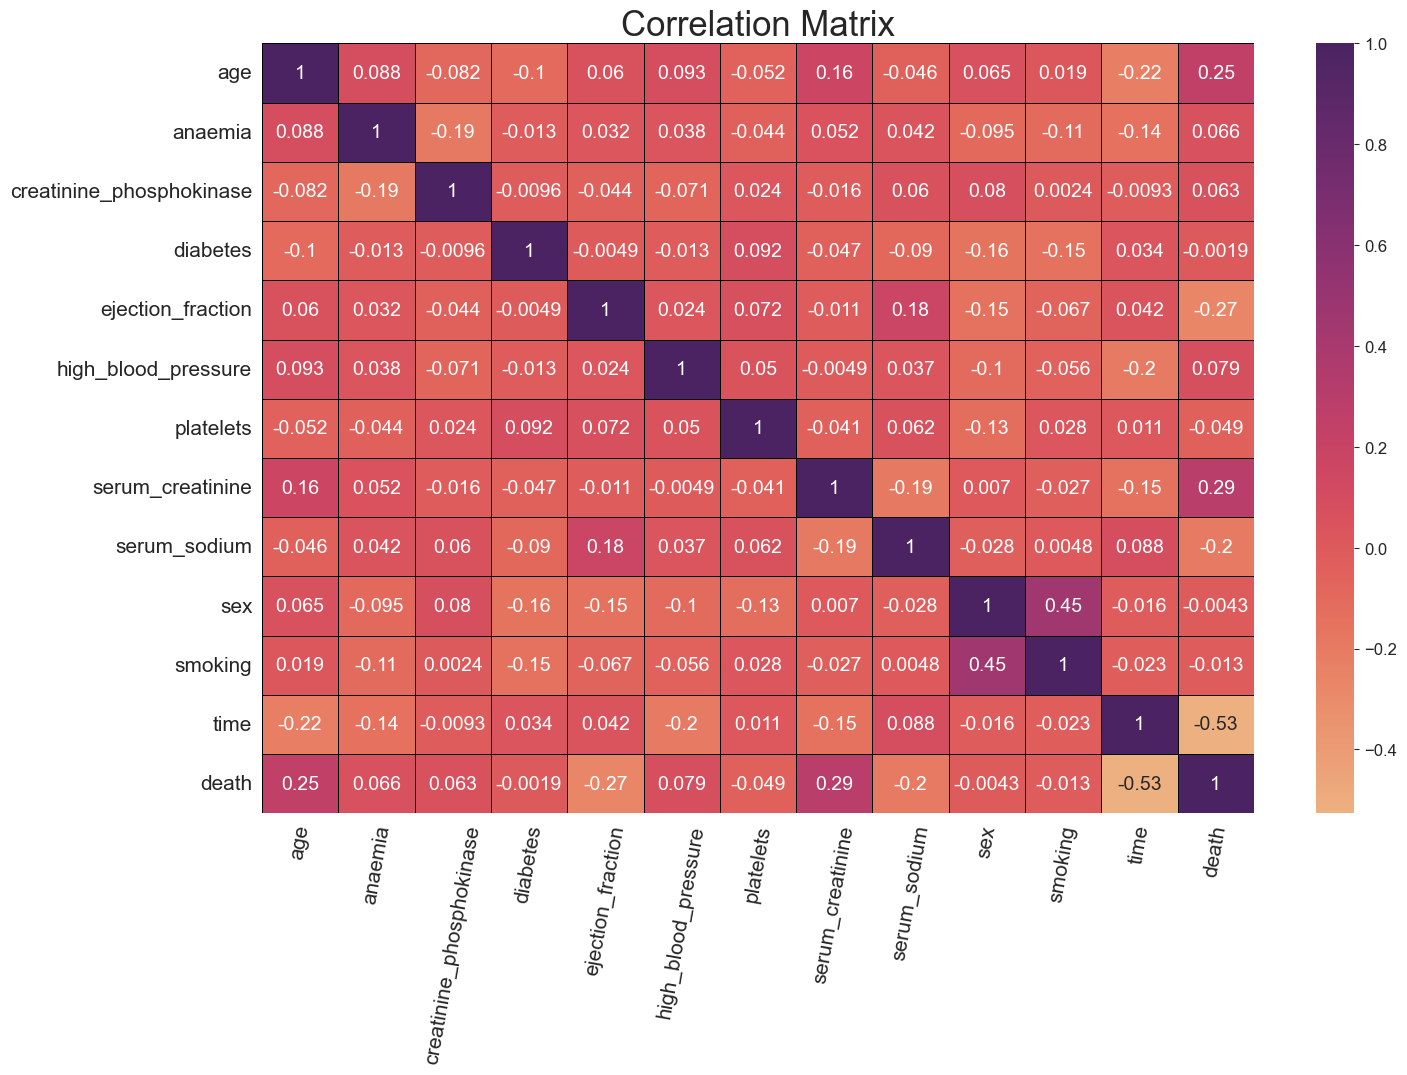

In [5]:
### Put code here

# Make the figsize larger to make it easier to read
plt.figure(figsize = (16, 10))

# Create the correlation matrix by using Pandas
corr_mat = df.corr()

# Plot a heatmap by using seaborn
sns.heatmap(corr_mat, annot = True, annot_kws = {'size':14}, cmap = 'flare', linewidths = 0.7, linecolor = "black")
sns.set(font_scale = 1.5)
plt.title('Correlation Matrix', fontsize = 25)
plt.xticks(fontsize = 15, rotation = 80)
plt.yticks(fontsize = 15)
plt.show()

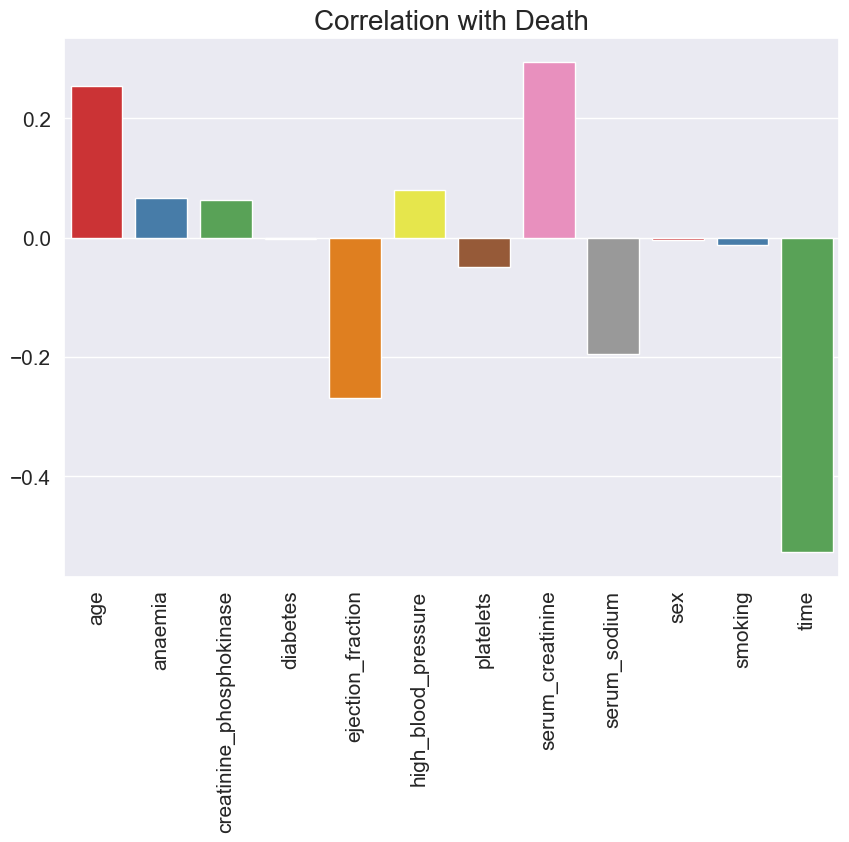

In [6]:
corr_values = df.corr()['death'].drop('death')

# Plot the correlation with the target feature (death)
sns.barplot(x = corr_values.index, y = corr_values.values, palette = "Set1")
plt.title('Correlation with Death', fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(rotation = 90, fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Distribution of High Blood Pressure by Sex')

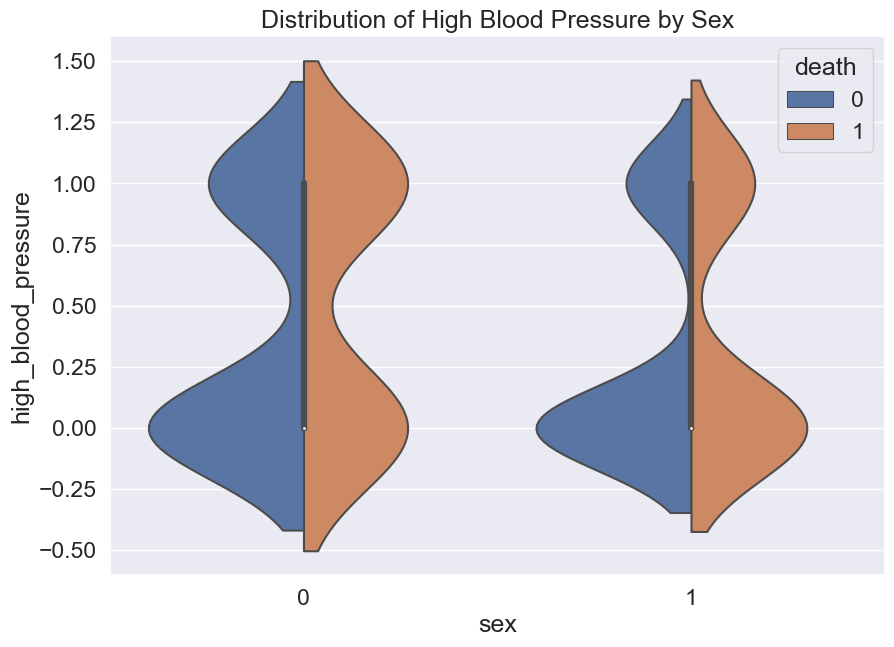

In [7]:
# change figsize back to (10, 7)
plt.figure(figsize = (10, 7))

# Lets create a violinplot of sex vs. high blood pressure and splitted by death
sns.violinplot(data = df, x = 'sex', y = "high_blood_pressure", hue = 'death', split = True)
plt.title('Distribution of High Blood Pressure by Sex')

Text(0.5, 1.0, 'Distribution of Smoking by Sex')

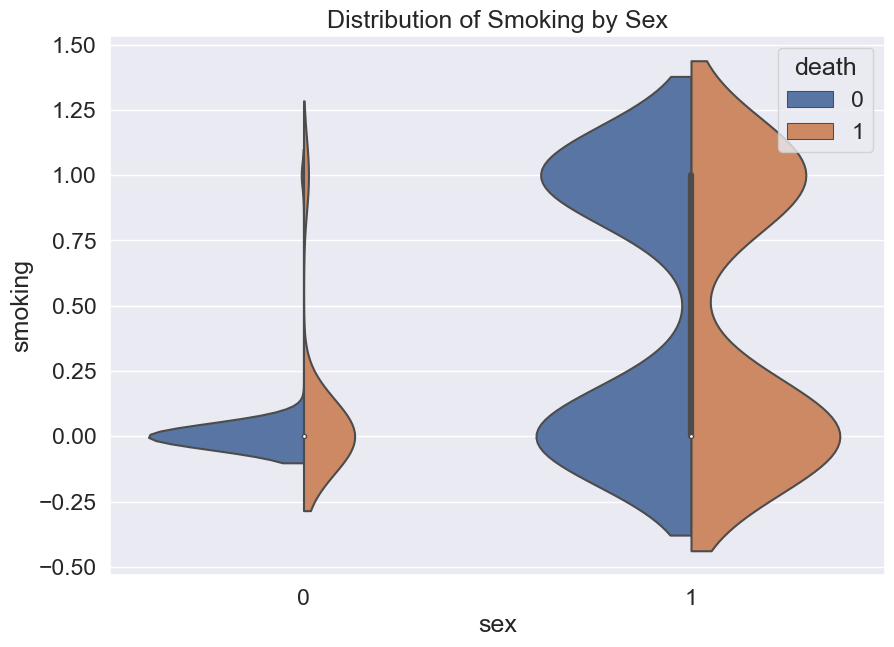

In [8]:
# Lets create a violinplot of sex vs. smoking and splitted by death
sns.violinplot(data = df, x = 'sex', y = "smoking", hue = 'death', split = True)
plt.title('Distribution of Smoking by Sex')

Text(0.5, 1.0, 'Distribution of Time by Sex')

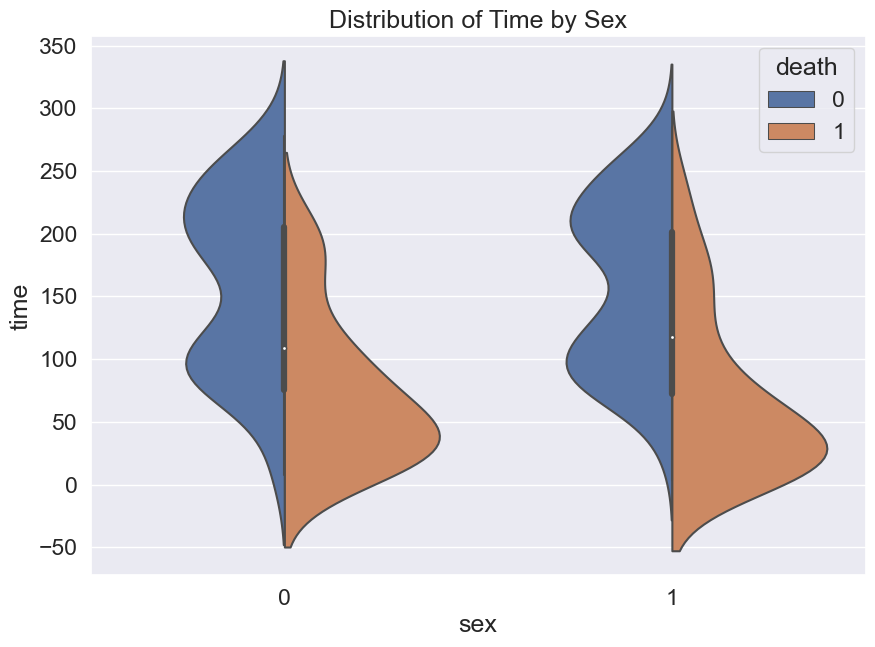

In [9]:
# Create a violinplot of sex vs. time and splitted by death
sns.violinplot(data = df, x = 'sex', y = 'time', hue = 'death', split = True)
plt.title('Distribution of Time by Sex')

Text(0.5, 1.0, 'Serum Sodium Levels by Death')

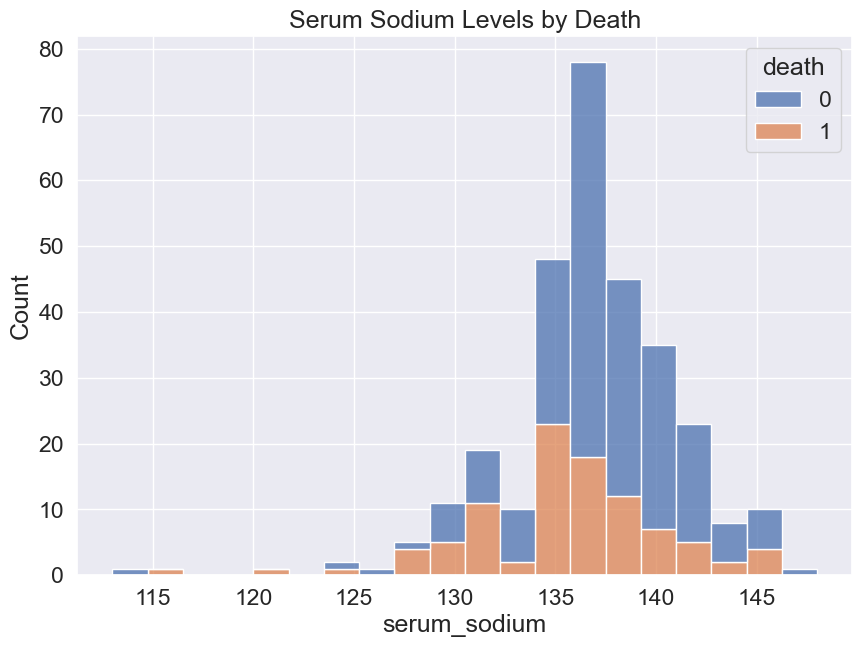

In [10]:
# Create a histplot of serum_sodium vs death
sns.histplot(data = df, x = 'serum_sodium', hue = 'death', multiple = 'stack')
plt.title('Serum Sodium Levels by Death')

Text(0.5, 1.0, 'Age Distribution by Death')

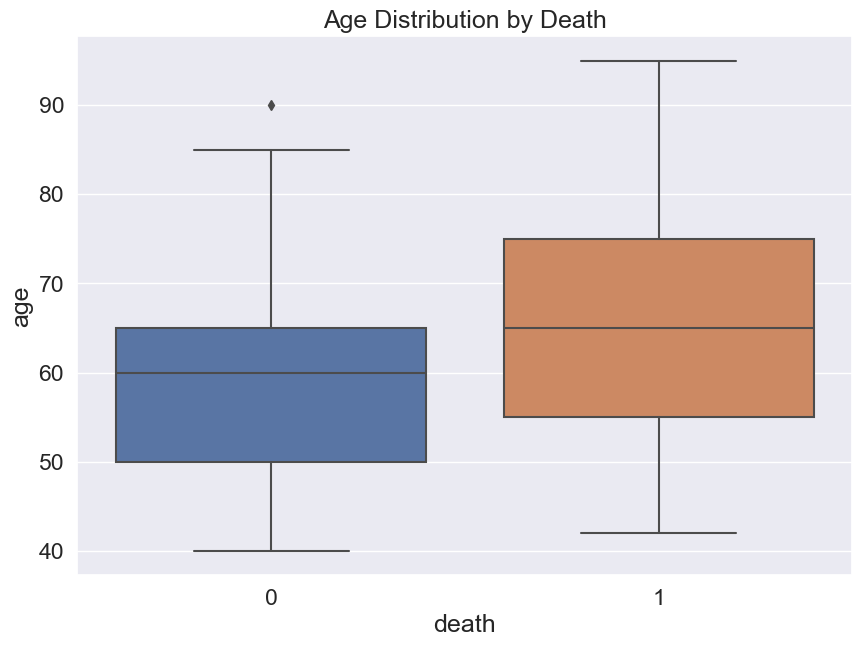

In [11]:
# Create a boxplot of age distribution by death
sns.boxplot(data = df, x = 'death', y = 'age')
plt.title('Age Distribution by Death')

Text(0.5, 1.0, 'Serum Creatinine Distribution by Diabetes')

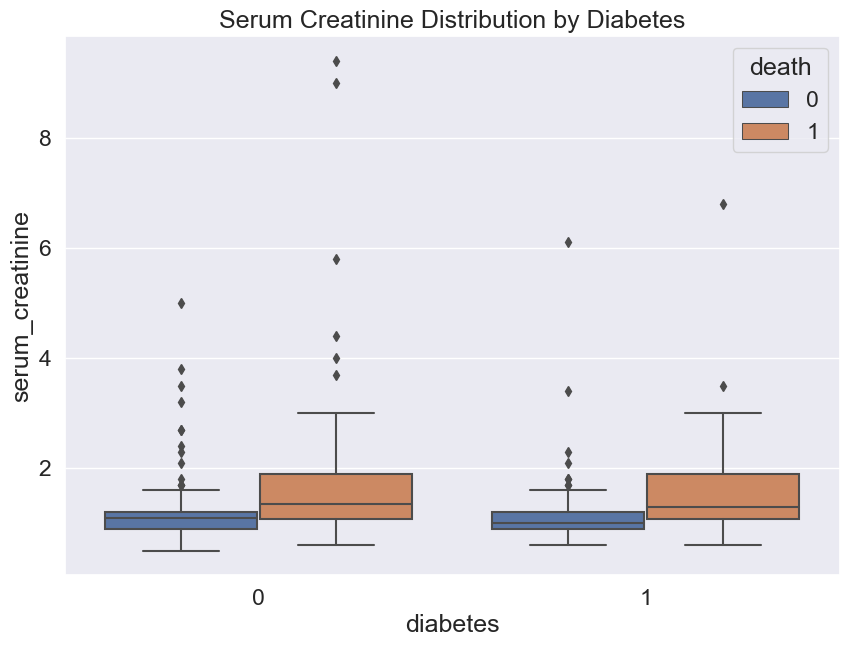

In [12]:
# Create a boxplot of Serum Creatinine Distribution by Diabetes
sns.boxplot(data = df, x = 'diabetes', y = 'serum_creatinine', hue = 'death')
plt.title('Serum Creatinine Distribution by Diabetes')

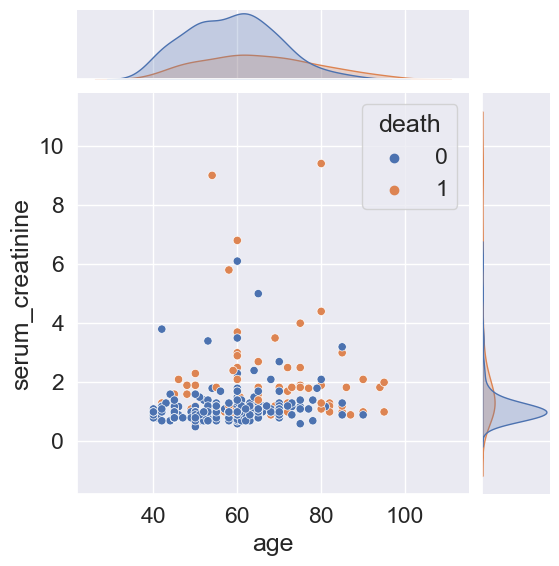

In [13]:
# Lets create a jointplot where I will have a scatterplot of age vs. serum creatinine.
# Also, have kde like plot for age and serum creatinine on its axis
sns.jointplot(data = df, x = 'age', y = 'serum_creatinine', hue = 'death')

__Q2:__ Was there anything interesting you learned from your plots? If so, what?

The relationship between death and diabetes is almost zero by 0.0019, so it is a meaningless relationship between them. 

The relationship between death and time has a strong negative correlation. 

The violinplot that I created for the distribution of high blood pressure by sex is identical to each other. Same with the distribution of time by sex.

There was a large number of outliners from the boxplot that I created for serum_creatinine by diabetes while death is the target.

__Q3:__ Is there anything the data did not tell you that you expected to see?

Yes, when I created a violinplot of Sex vs Smoking split by Death, I expected it will be a good analysis since it is moderately correlated (.45). However, I do not expect that Females are very low or almost none to smoke than men. 

### Part 2: Logistic Regression

Since you've had ample experience using Sci-Kit Learn's different functions, you probably recognize by now that almost all of Sci-Kit Learn's classification and regression methods have the same basic structure of 'fit' then 'predict' and maybe some extra functions based on the type of model used (like residuals or coefficients for linear regression). So, for this part, you will be largely on your own, with less detailed instructions. If you have any questions, check out your previous labs, the lecture notes, or the just google the specific function to see how to use it.

First, let's scale and then split the data. You choose what test_size to use. For the scalar, we know that most of our features do not follow a normal distribution (as most are categorical variables), so we will use the MinMaxScaler(). Create the following:

- train_x    (pandas df)
- test_x     (pandas df)    
- train_y    (array)
- test_y     (array)

In [14]:
### Put code here to mimic the below output

# Drop death for X values and assign it for y value
X = df.drop('death', axis = 1)
y = df['death']

# Scale the x values by using MinMaxScaler
mm_scale = MinMaxScaler()
X_scaled = mm_scale.fit_transform(X)

# Replace these scaled values to our dataframe
train_x = pd.DataFrame(data = X_scaled, columns = X.columns)

# Call head for train_x to see first 5 data values
train_x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235


In [15]:
# Now Lets start splitting the data and I am using 0.2 for test size
train_x, test_x, train_y, test_y = train_test_split(X_scaled, y, test_size = 0.2)

Create a Logistic Regression Model and output the accuracy on the training and testing set

In [16]:
### Put code here to mimic the below output

# Create a LogisticRegression model
lr = LogisticRegression()

# Fit the model
lr.fit(train_x, train_y)

# Predictions on training set
pred_train = lr.predict(train_x)

# Output the accuracy on the training
from sklearn.metrics import accuracy_score
print('Training Accuracy: ', accuracy_score(train_y, pred_train))

Training Accuracy:  0.8493723849372385


In [17]:
### Put code here to mimic the below output

# Predictions on testing set
pred_test = lr.predict(test_x)

# Output the accuracy on the testing
print('Testing Accuracy: ', accuracy_score(test_y, pred_test))

Testing Accuracy:  0.8333333333333334


__Q4:__ What interval are the outputs of a logistic regression model contained in?

A logistic regression model provides probabilities, which are always between 0 and 1, that a given input corresponds to a specific class. Therefore, the interval [0,1] contains the outcomes of a logistic regression model.

__Q5:__ How does a Logistic Regression model classify data in a binary way?

Using decision boundaries to create boundaries by separating two classes. So, we can use the Logistic Regression function to graph the x-values to get the probability value between 0 and 1. Then we use the threshold for these outcomes to make the final binary classification decision.

Create a confusion matrix for the testing data.

Add ```plt.grid(b=None)``` after your code if you get gridlines

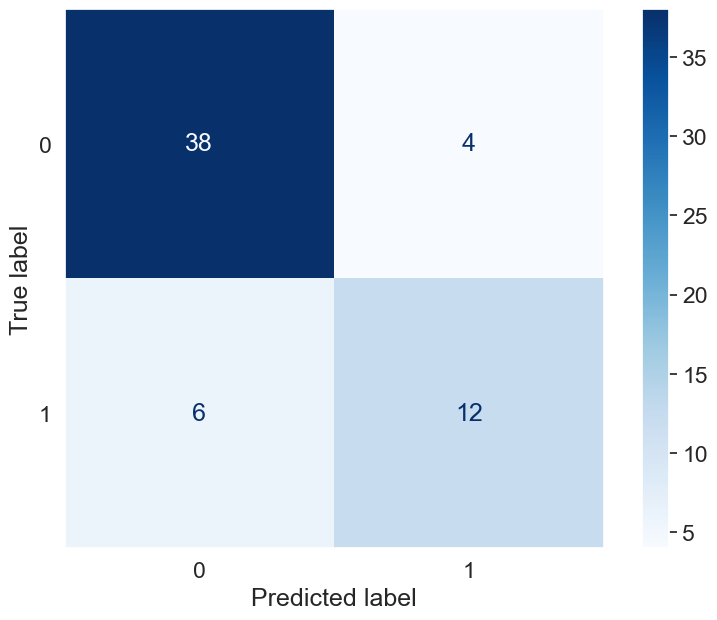

In [18]:
### Put code here to mimic the below output

# Create a confusion matrix for testing set of x
cf_m = confusion_matrix(test_y, pred_test)

# Put in ConfusionMatrixDisplay function
cf_m_display = ConfusionMatrixDisplay(cf_m)

# Plot the confusion matrix
cf_m_display.plot(cmap = 'Blues')

# For gridlines
plt.grid(b=None)

Print the recall

In [19]:
### Put code here to mimic the below output

# Importing recall_score
from sklearn.metrics import recall_score

# calculate recall score
recall = recall_score(test_y, pred_test)

# Print the output
print('Recall score:', recall)

Recall score: 0.6666666666666666


__Q6:__ What does the recall represent (Don't just tell me the formula)?

Recall indicates how well the model can correctly predict positive results from the actual positive instances. A high recall score means good for our model.

Print the precision

In [20]:
### Put code here to mimic the below output

# Importing precision_score
from sklearn.metrics import precision_score

# calculate precision score
precision = precision_score(test_y, pred_test)

print('Precision score:', precision)


Precision score: 0.75


__Q7:__ What does the precision represent (Don't just tell me the formula)?

Precision indicates how many of the instances predicted as positive by the model are actually positive. Again, a high precision score means good for our model.

__Q8:__ Which types of errors would be more costly for this problem, False Positives or False Negatives? Why?

I would say false negatives would be more costly for this problem. Because let's say that we falsely predict a patient that does not have heart disease when the patient does actually have it. Now the patient's health risk increased and caused many troubles, such as delaying treatments.

Now, let's plot the predictions to try and get an idea of how our model performed. Plot the probability predictions of class label 1 (death), not the classification.

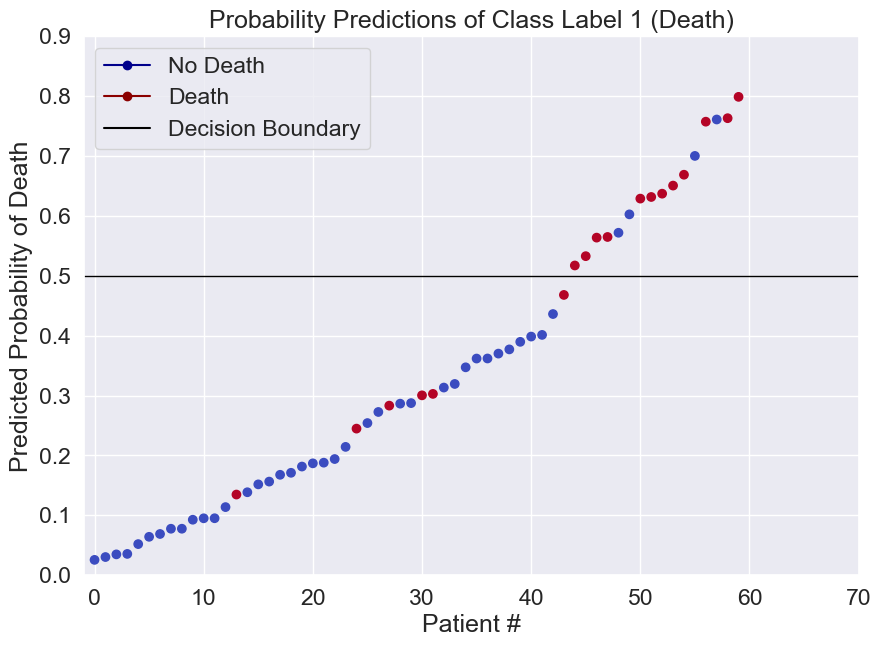

In [21]:
### Put code here to mimic the below output

# Get predicted probabilities of the LR model for testing set
pred_proba = lr.predict_proba(test_x)

# Get the actual labels for test set
test_labels = test_y.values

# Sort the probabilities
sorted_indices = np.argsort(pred_proba[:, 1])

# Plot the probability predictions of class label 1
plt.scatter(np.arange(len(sorted_indices)), pred_proba[sorted_indices, 1],
            c = test_labels[sorted_indices], cmap = 'coolwarm')

# Plot a decision boundary to seperate classes
plt.axhline(0.5, color = 'black', linestyle = '-', linewidth = 1)

# Add a Legend
plt.plot([], [], color = 'darkblue', marker = 'o', label = 'No Death')
plt.plot([], [], color = 'darkred', marker = 'o', label = 'Death')
plt.plot([], [], color = 'black', label = 'Decision Boundary')
plt.legend()

# Modify and give names to labels
plt.title('Probability Predictions of Class Label 1 (Death)')
plt.xlabel('Patient #')
plt.ylabel('Predicted Probability of Death')
plt.xlim(-1, 70)
plt.ylim(0.0, 0.9)
plt.show()

__Q9:__ Does this plot tell us anything interesting about our model? How well does it classify the data?

From the graph, I see death starts to count a lot after patient #40 or above the decision boundary at (0.5). Also, the predicted probability of death is getting steeper after the 0.4 value. It classifies the data well until Patient # reaches about 40 because the predicted probability of death starts to pick up after #40.

Create a data frame of the coefficients of the model

In [22]:
### Put code here to mimic the below output

# Create a pandas DataFrame of the coef of the model 
df_coef = pd.DataFrame({'Features': X.columns, 'Coefficients': lr.coef_.flatten()})

# Call df_coef to show the output
df_coef

,Features,Coefficients
0,age,1.485859
1,anaemia,-0.110067
2,creatinine_phosphokinase,0.539262
3,diabetes,0.027019
4,ejection_fraction,-2.083835
5,high_blood_pressure,-0.020973
6,platelets,-0.408699
7,serum_creatinine,1.744738
8,serum_sodium,-1.155460
9,sex,-0.354377


__Q10:__ What do these coefficients mean? How are they calculated?

These coefficients of the logistic regression model indicate the log odds ratio of the target variable, which is death per unit change in the X variable while maintaining the same values for all other X variables. These coefficients were determined using model parameters that maximize the likelihood of receiving the desired data.

__Q11__: Based on that, which features are important to the model?

I think features like time, ejection_fraction, age, and serum_creatinine are important to the model. Time has a coefficient of -3.645, and ejection_fraction has a coefficient of -2.084, having larger absolute values than all other negative coefficients of the model. Age has coefficients of 1.486, and serum_creatinine has coefficients of 1.745, which have larger absolute values than all other positive coefficients of the model.

Do any other analysis you see fit, whether exploring the data more, assessing the model more intensely, etc.

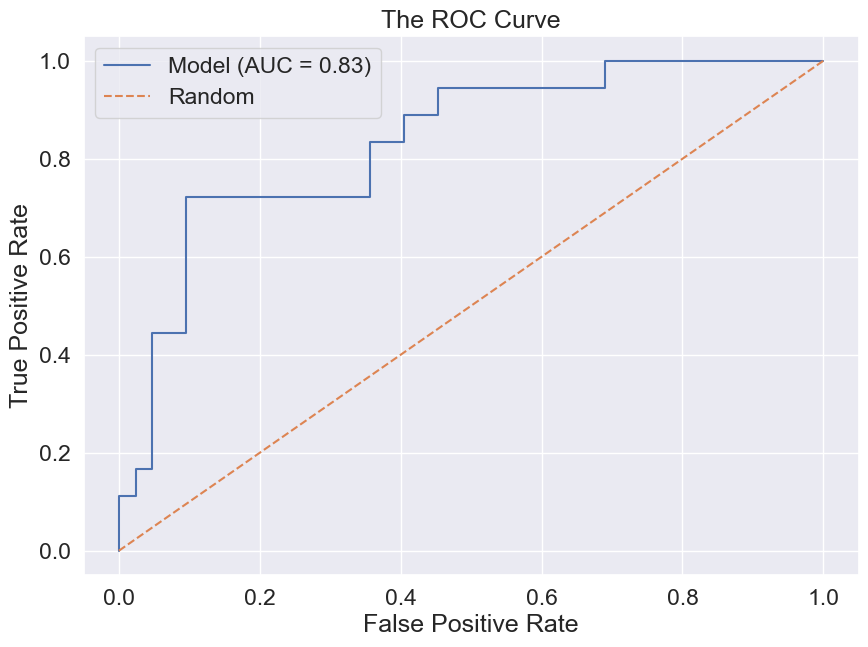

In [23]:
# Lets try doing ROC Curve for our model

# Importing roc_curve and roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the FP rate, TP rate and thresholds
fpr, tpr, thresholds = roc_curve(test_y, pred_proba[:, 1])

# Determine the AUC score
auc_score = roc_auc_score(test_y, pred_proba[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr, label = 'Model (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The ROC Curve')
plt.legend()
plt.show()

Finally, write your final report about your conclusions. Remember, you should write 1 - 2 paragraphs about what you did, why you did it, and what it means for the stakeholder. I _don't_ just want a summary of the work you did. I know what you did. I want to know what the analysis told you about the data. 

A research team of cardiologists is trying and wanting to get a better understanding of their group of patients, whether they have heart disease or not. The research team already has a dataset of 299 patients, but they do not know what to do. So, they do not have any data science or machine learning experience. This is where they contacted me to help them to try and get a better understanding of their group of patients. Even I need to include the stakeholders because they want to learn something from the data as well. So, I begin to look at the dataset and saw that there are many boolean values, such as 0s and 1s. Which I will be dealing with many categorical variables for this study. I used Logistic Regression to predict heart disease from all patients because I have many categorical variables and will get better accuracy than using Linear Regression. Before I do any logistic regression analysis, I did a visual analysis of the dataset to see what is going on with the data. I plotted a heatmap for the correlation matrix to see every relationship between two variables and check if there was any severe collinearity. However, I plotted the correlation with the target feature (death) as a barplot, which will help me, and the stakeholders easily understand the relationship of every feature with death. For example, we see time feature has a strong negative correlation with death, and serum_creatinine has the highest positive correlation with death. Then I plotted a few other things, such as the violinplot, boxplot, histplot, and a scatterplot which I used for the jointplot. In my overall analysis of these plots, I see that females tend to have higher blood pressure and more death counts than men. Men smoke far more than females; however, there was a huge long-tail distribution above the third quartile for females, and I see more deaths than non-deaths. I'm assuming that these females do have heart disease for the one who died from smoking. My histplot on serum sodium, there was a lot of activity between 125 - 145 levels, and many deaths were counted from there. Based on my boxplot, I see that many deaths happened to those above the age of 55.

Furthermore, I begin the Logistic Regression analysis to predict heart disease and find the accuracy of the data. I used MinMaxScaler to scale that data because we want to scale all X values in the range of 0 to 1, and we have some binary variables in our dataset. Then I split the data by using test size 0.2, which is 80% training and 20% testing. After I fit and make predictions of my model, my training accuracy is over 84%, and the testing accuracy is over 83%. Both of these scores are showing that I got a good model. I create a confusion matrix for the testing data. I have 38 true negatives, 12 true positives, 6 false negatives, and 4 false positives. The results were okay, but they could have been worse because my recall score was 66.7%, and my precision score was 75%. However, recall is important to look at because we have 6 false negatives, and predicting patients not to have heart disease when they do actually have it is a serious problem. It increases health risks and caused more trouble for patients. Now I plotted the probability predictions of class label 1 (death) using logistic regression. Based on the plot, when the predicted probability of death is over 0.5 value the death counts start to pick up. This is where I draw a decision boundary at 0.5 to separate two classes and will help us to visualize the plot easier. Then I calculated the coefficients of the model, and I have features like time, ejection_fraction, age, and serum_creatinine seem more important than all others. The negative factors of time (-3.645) and ejection_fraction (-2.084) have greater absolute values than the other negative coefficients in the model. Age and serum creatinine both have coefficients with greater absolute values than all other positive coefficients in the model, at 1.486 and 1.745, correspondingly. There is another analysis I did for this model is doing the Receiver Operating Characteristic (ROC) Curve. To work with this ROC Curve is that I have to calculate the False Positive Rate, True Positive Rate, and Thresholds. I use the ROC Curve because it tells us how efficient the model is. I also calculated the Area under the ROC Curve (AUC) score to see the actual score, which is 0.83. To clarify, the AUC score is showing that we do have a good model, which is above 0.80. I can say that the research team of cardiologists does have a pretty good dataset. So far, from the analysis, we can say that the features that we should be focusing on are time, ejection_fraction, age, and serum_creatinine to predict patients whether have heart disease or not.